In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv("candy-data.csv")
df = df.drop(['competitorname'], axis = 1)

In [5]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
trainSet, testSet = train_test_split(df, test_size=0.2, random_state=53.22)

In [8]:
train_df = trainSet
test_df = testSet

In [10]:
x_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_train = train_df['chocolate']

x_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_test = test_df['chocolate']

In [14]:
x_train.shape, y_train.shape

((68, 11), (68,))

In [12]:
y_train.value_counts()

chocolate
0    39
1    29
Name: count, dtype: int64

In [16]:
x_train.value_counts()

fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  winpercent
0       0        0               0       0                 0     0    0         0.011         0.116         32.261086     1
                                                                                              0.511         46.116505     1
                                                                                0.313         0.511         43.068897     1
                                                                      1         0.174         0.011         45.736748     1
                                                                                0.197         0.511         57.219250     1
                                                                                                                         ..
1       0        0               0       0                 1     0    1         0.569         0.058         34.578991     1
             

C:\Users\user\AppData\Local\Temp\ipykernel_22544\351347467.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chocolate", data = train_df, palette = 'Blues_d')


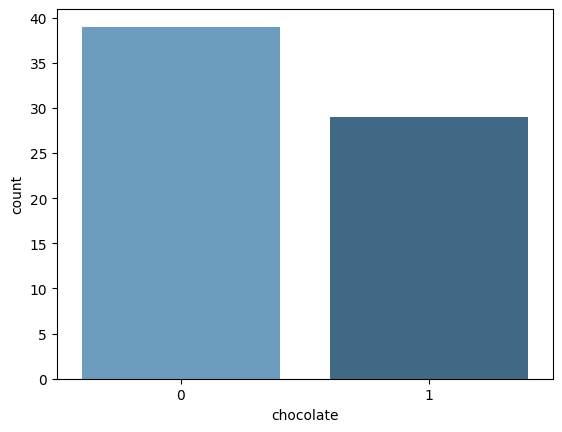

<Figure size 640x480 with 0 Axes>

In [15]:
sns.countplot(x="chocolate", data = train_df, palette = 'Blues_d')
plt.show()
plt.savefig('count_plot')

In [17]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [18]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9, 0],
       [0, 8]])

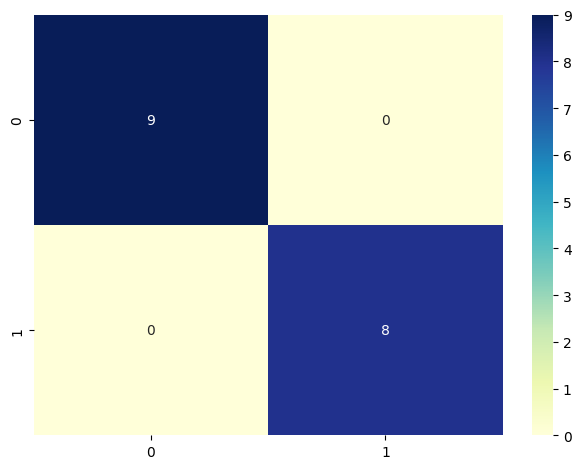

In [21]:
class_names=[0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()


In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))

Accuracy: 1.0
precision: 1.0
Recall 1.0
